# Simulating the Golenetskii correlation with popsynth

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import popsynth
from popsynth.aux_samplers.trunc_normal_aux_sampler import TruncatedNormalAuxSampler
from popsynth.aux_samplers.lognormal_aux_sampler import LogNormalAuxSampler

## GRB population

In [29]:
# redshift distribution
r0_true = 1. #1/20.
rise_true = 1.
decay_true = 4.0
peak_true = 1.5
r_max = 7.0


pop_gen = popsynth.populations.SFRPopulation(
    r0=r0_true,
    rise=rise_true,
    decay=decay_true,
    peak=peak_true,
    r_max=r_max,
)

## Auxiliary samplers

In [3]:
from aux_samplers import DurationSampler, EpeakObsSampler, LumSampler

In [4]:
t90 = LogNormalAuxSampler(name="log_t90", observed=False)
t90.mu=10
t90.tau=0.25

log_ep = LogNormalAuxSampler(name="log_ep", observed=False)
log_ep.mu=300
log_ep.tau=0.4

log_nrest = LogNormalAuxSampler(name="log_nrest", observed=False)
log_nrest.mu = 1e52
log_nrest.tau = 0.1

gamma = TruncatedNormalAuxSampler(name="gamma", observed=False)
gamma.mu = 1.5
gamma.tau = 0.5
gamma.lower = 1.0
gamma.upper = 2.0

duration = DurationSampler()
obs_lum = LumSampler()
log_ep_obs = EpeakObsSampler()
duration.set_secondary_sampler(t90)
obs_lum.set_secondary_sampler(log_ep)
obs_lum.set_secondary_sampler(log_nrest)
obs_lum.set_secondary_sampler(gamma)
log_ep_obs.set_secondary_sampler(log_ep)

In [5]:
pop_gen.add_observed_quantity(duration)
pop_gen.add_observed_quantity(obs_lum)
pop_gen.add_observed_quantity(log_ep_obs)

registering auxilary sampler: duration
registering derived luminosity sampler: obs_lum
registering auxilary sampler: log_ep_obs


## Survey

In [6]:
population = pop_gen.draw_survey(no_selection=True, boundary=1e-2, flux_sigma=0.)

The volume integral is 381.111856



Expecting 32 total objects
Sampling: obs_lum
obs_lum is sampling its secondary quantities
Sampling: log_ep
Sampling: log_nrest
Sampling: gamma
Getting luminosity from derived sampler
Sampling: duration
duration is sampling its secondary quantities
Sampling: log_t90
Sampling: log_ep_obs
log_ep_obs is sampling its secondary quantities
Applying soft boundary



No Selection! Added back all objects
NO HIDDEN OBJECTS
Deteced 362 objects or to a distance of 4.99


<IPython.core.display.Javascript object>

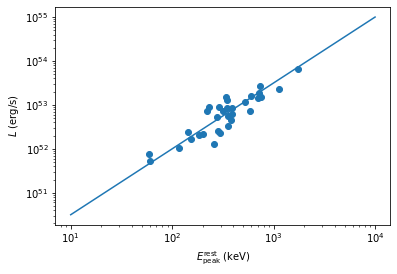

Text(0, 0.5, '$L$ (erg/s)')

In [7]:
fig, ax = plt.subplots()
Egrid = 10**np.linspace(1, 4)

ax.scatter(10**population.log_ep, population.luminosities)
#ax.scatter(10**population.log_ep, population.obs_lum)
ax.plot(Egrid, 1e52 * np.power(Egrid/100, 1.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$E_\mathrm{peak}^\mathrm{rest}$ (keV)')
ax.set_ylabel('$L$ (erg/s)')

<IPython.core.display.Javascript object>


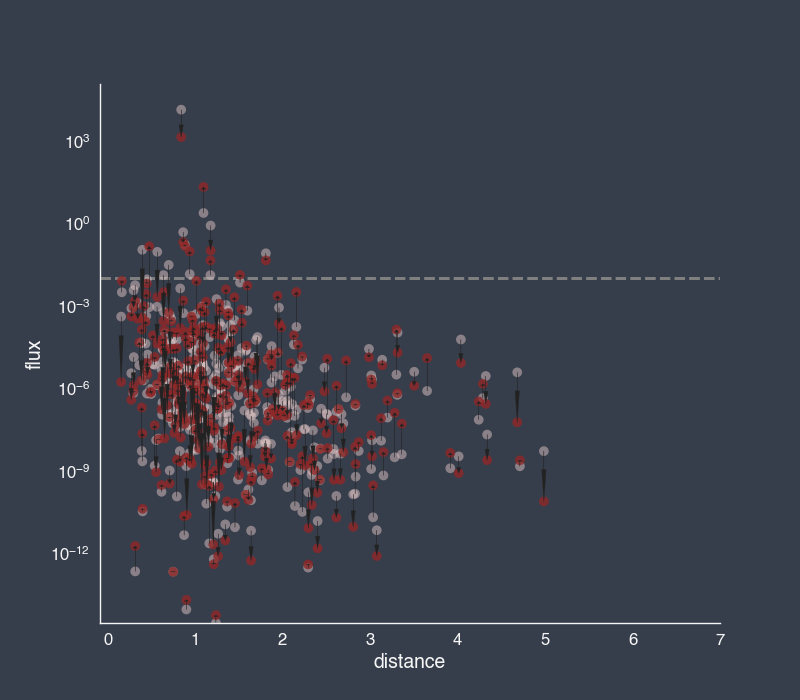

In [81]:
population.display_fluxes();

array([52.04235928, 51.49867095, 50.68899127, 53.47947844, 50.58826713,
       51.13435629, 51.0922892 , 51.30398593, 52.07724385, 51.79512624,
       52.72867874, 51.62727526, 52.50300177, 51.84317681, 50.60312251,
       52.17780744, 52.20138006, 53.13190757, 51.88078267, 51.14965705,
       51.28503305, 53.33048654, 53.21842232, 52.40234567, 51.97954318,
       50.56263388, 51.6164778 , 50.15298175, 51.41255351, 51.95686181,
       51.73993827, 53.07148842, 51.91781537, 52.13882562, 52.29490549,
       53.40269266, 51.37778361, 51.47751303, 52.17797111, 50.81451069,
       51.59522455, 52.23937594, 51.77879355, 52.13241966, 51.95798347,
       50.93872688, 52.0764792 , 53.59921747, 51.48224274, 50.59937751,
       52.53858891, 52.65628239, 51.58631923, 51.03040846, 53.23457607,
       51.86141025, 54.37030628, 51.97774564, 53.03320166, 53.14762898,
       51.92262928, 51.78600113, 52.1950171 , 52.45756252, 52.3548062 ,
       53.95120769, 53.56800797, 53.23256528, 52.17426935, 53.04

In [71]:
population.log_ep_start.max()

5.700116974090916

Text(0, 0.5, '$F_E$ (erg $\\mathrm{s}^{-1}$ $\\mathrm{cm}^{-2}$)')

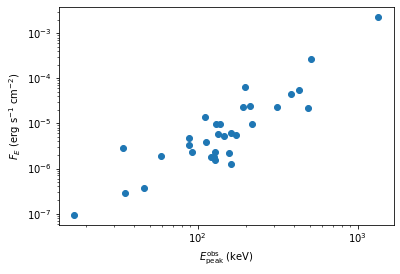

In [9]:
fig, ax = plt.subplots()
ax.scatter(10**population.log_ep_obs, population.latent_fluxes)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$E_\mathrm{peak}^\mathrm{obs}$ (keV)')
ax.set_ylabel('$F_E$ (erg $\mathrm{s}^{-1}$ $\mathrm{cm}^{-2}$)')

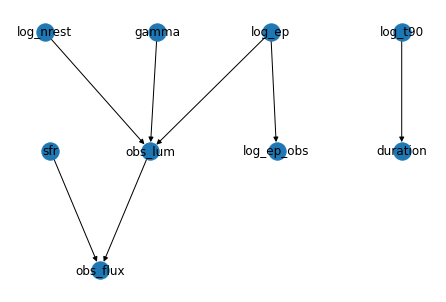

In [10]:
pos=nx.drawing.nx_agraph.graphviz_layout(pop_gen.graph, prog='dot')

nx.draw(pop_gen.graph, with_labels=True,pos=pos)